# **Stage 2: Data Preprocessing** #

## **Data Cleansing** ##

- Handing missing value
- Handle duplicated data
- Handle outliers
- Feature transformation
- Feature encoding
- Handle class imbalance

### **Dataset: Marketing Campaign** ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyoff

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep=';')

### **Descriptive Analysis** ###

In [167]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [169]:
cats = ['Education', 'Marital_Status', 'Dt_Customer']
            
nums = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome','Recency', 
        'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
        'Response', 'Complain','Z_CostContact', 'Z_Revenue']

In [170]:
df[cats].describe()

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,2012-08-31
freq,1127,864,12


In [171]:
df[nums].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Z_CostContact,Z_Revenue
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,0.009375,3.000000,11.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,0.096391,0.000000,0.000000
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000


### **Missing Value Handling** ###

In [172]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Terdapat missing value di kolom `income`, nilai yg kosong dapat diisi dengan `mean`

In [173]:
# impute missing value for Income with mean
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [174]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

missing values = solved

### **Duplicated Data** ###

In [175]:
# cek jumlah duplicated rows
# dari semua kolom
df.duplicated().sum()

0

tidak ditemukan data duplikat pada dataset

### **Outliers Handling** ###

In [176]:
from scipy import stats

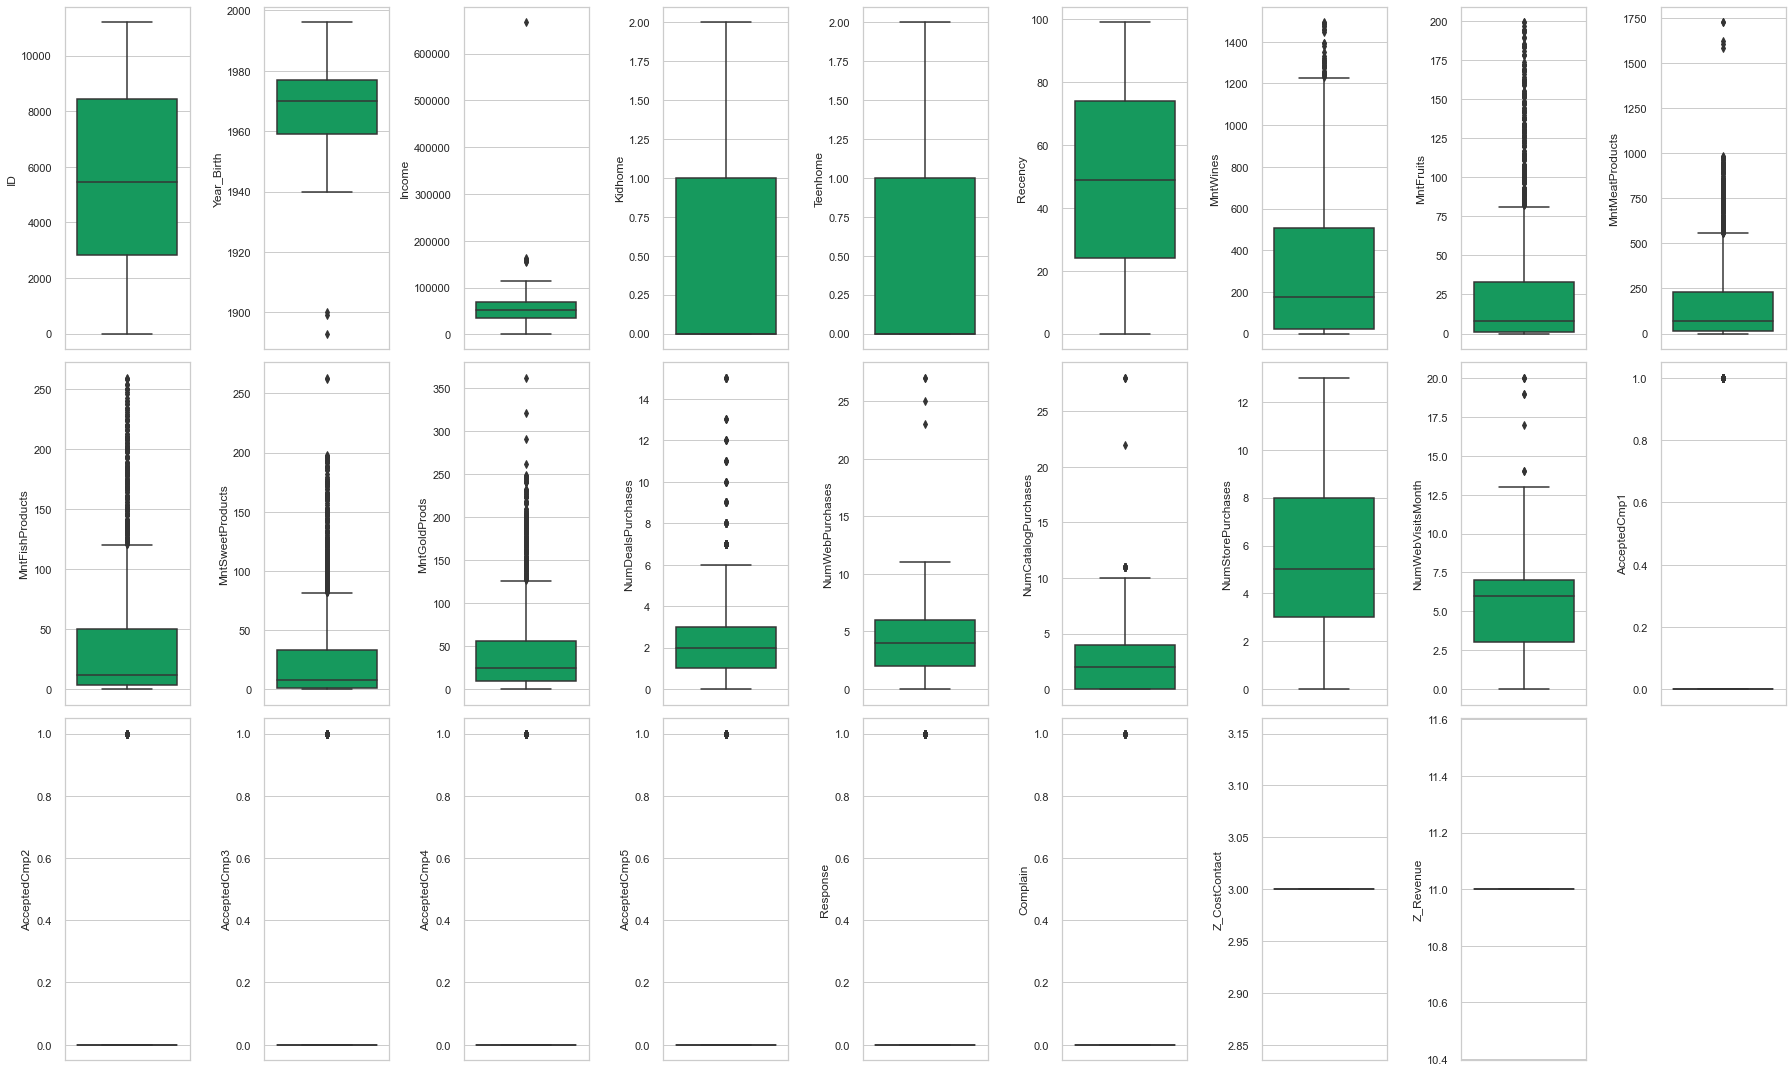

In [177]:
#cek outliers dari boxplot
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(nums)):
    plt.subplot(n, math.ceil(len(nums)/n), i+1)
    sns.boxplot(y=df[nums[i]], color='#00af5f', orient='v')
    plt.tight_layout()

terdapat outlier di kolom `Year_Birth` dan `Income`, perlu remove outliers menggunakan Zscore

terdapat outliers di semua kolom product type, handling outliers menggunakan Log Tranform

terdapat outliers di semua kolom product type, handling outliers menggunakan Log Tranform

In [178]:
# Menghilangkan outliers pada kolom Year_Birth and Income

print(f'jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_enteries = np.array([True] * len (df))

for col in ['Income', 'Year_Birth']:
    zscore = abs(stats.zscore(df[col]))
    filtered_enteries = (zscore < 3) & filtered_enteries
    
df = df[filtered_enteries]

print(f'jumlah baris sesudah memfilter outlier: {len(df)}')

jumlah baris sebelum memfilter outlier: 2240
jumlah baris sesudah memfilter outlier: 2229


### **Feature Transformation = Log Tranformation** ####

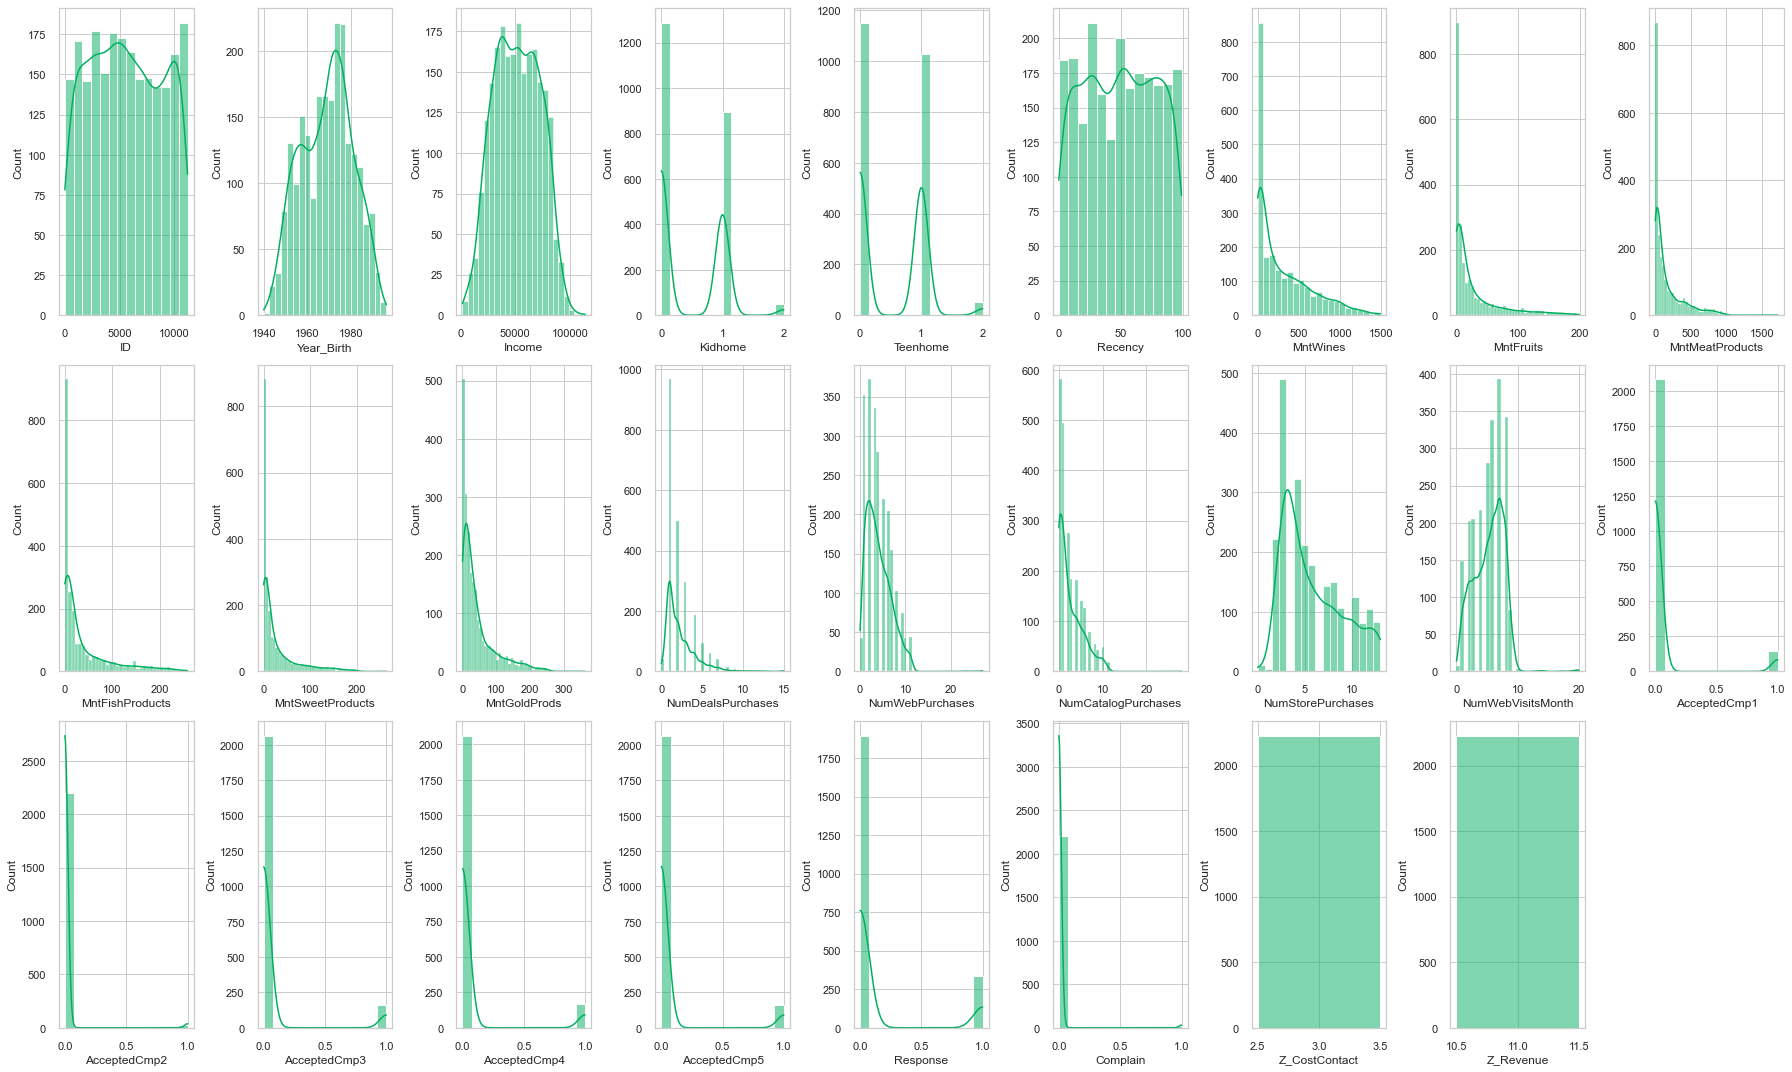

In [179]:
# melihat skewed
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(nums)):
    plt.subplot(n, math.ceil(len(nums)/n), i+1) 
    sns.histplot(df[nums[i]], color='#00af5f', kde=True)
    plt.tight_layout()

yang right/positive skewed:
Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases

In [180]:
positive_skewed = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                   'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases']

# check skewness value
for i in positive_skewed:
    skewness = df[i].skew(axis=0, skipna=True)
    print('skewness feature',i,'adalah', skewness)

skewness feature MntWines adalah 1.1720175038645104
skewness feature MntFruits adalah 2.099701644191376
skewness feature MntMeatProducts adalah 1.8901149574774054
skewness feature MntFishProducts adalah 1.9154855766017367
skewness feature MntSweetProducts adalah 2.131146412834206
skewness feature MntGoldProds adalah 1.8819324672758517
skewness feature NumDealsPurchases adalah 2.319278714428906
skewness feature NumWebPurchases adalah 1.3880938545574475
skewness feature NumCatalogPurchases adalah 1.3711330618783009


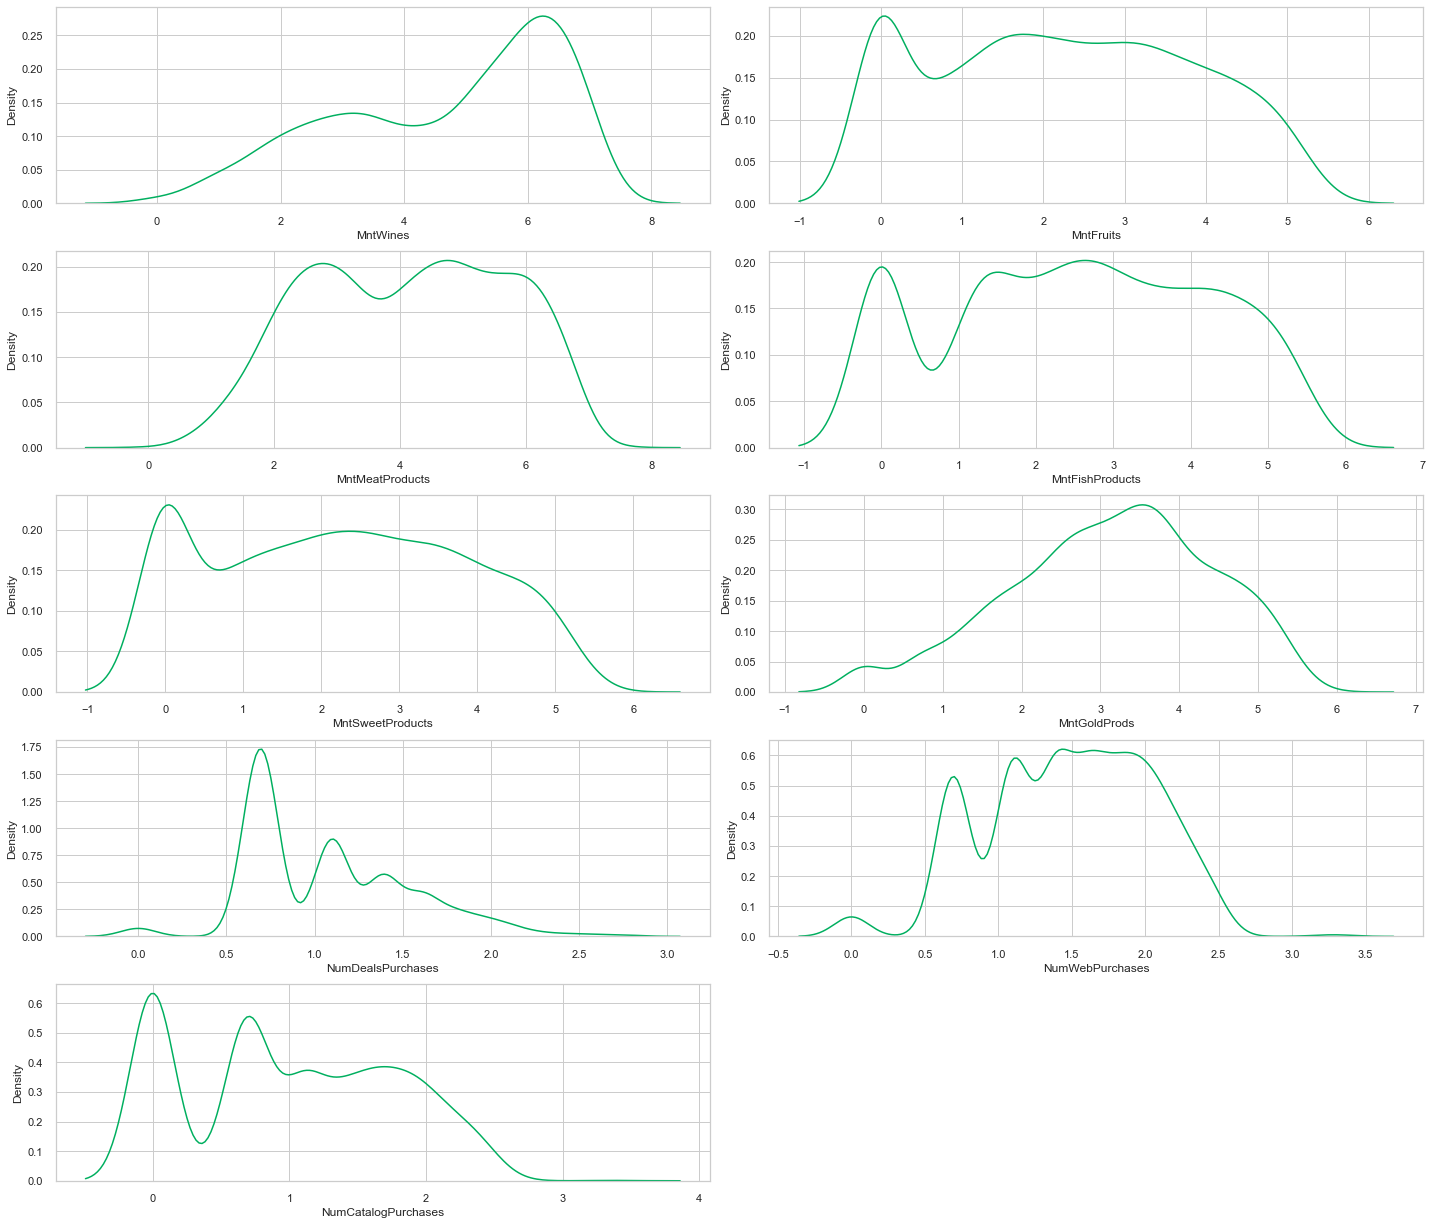

In [181]:
# log transformation for positively skewed features
plt.figure(figsize=(20,20))
for i in range(0, len(positive_skewed)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(np.log(df[positive_skewed[i]]+1), color='#00af5f')
    plt.tight_layout()

In [182]:
# check skewness value
for i in positive_skewed:
    skewness = np.log(df[i].skew(axis=0, skipna=True))
    print('skewness feature',i,'adalah', skewness)

skewness feature MntWines adalah 0.15872662608127247
skewness feature MntFruits adalah 0.7417952604413
skewness feature MntMeatProducts adalah 0.636637651283962
skewness feature MntFishProducts adalah 0.6499711552955718
skewness feature MntSweetProducts adalah 0.75666005691972
skewness feature MntGoldProds adalah 0.6322991570315024
skewness feature NumDealsPurchases adalah 0.841256238386062
skewness feature NumWebPurchases adalah 0.32793147835582
skewness feature NumCatalogPurchases adalah 0.3156374504865113


In [183]:
for i in positive_skewed:
    new_i = 'log_' + i
    df[new_i] = np.log(df[i]+1)

In [184]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,log_MntWines,log_MntFruits,log_MntMeatProducts,log_MntFishProducts,log_MntSweetProducts,log_MntGoldProds,log_NumDealsPurchases,log_NumWebPurchases,log_NumCatalogPurchases
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,5589.296097,1968.888739,51628.825945,0.444594,0.507402,49.106326,304.991476,26.348587,165.283984,37.642441,27.161507,44.113055,2.319874,4.100045,2.636608,5.812472,5.334231,0.073127,0.074921,0.072678,0.064603,0.013459,0.008973,3.000000,11.000000,0.149843,4.682330,2.242687,4.128059,2.538682,2.245432,3.127559,1.079644,1.482226,1.004849
std,3244.840538,11.707430,20601.302353,0.538636,0.544735,28.946476,336.761943,39.764060,219.336589,54.700548,41.338945,52.091255,1.895252,2.775461,2.796161,3.242144,2.414981,0.260403,0.263324,0.259666,0.245879,0.115255,0.094319,0.000000,0.000000,0.356998,1.800136,1.570153,1.554425,1.658498,1.594124,1.284325,0.466570,0.557390,0.766832
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2829.000000,1959.000000,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000,3.218876,1.098612,2.833213,1.386294,0.693147,2.302585,0.693147,1.098612,0.000000
50%,5455.000000,1970.000000,51563.000000,0.000000,0.000000,49.000000,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000,5.176150,2.197225,4.219508,2.564949,2.197225,3.218876,1.098612,1.609438,1.098612
75%,8420.000000,1977.000000,68118.000000,1.000000,1.000000,74.000000,505.000000,33.000000,231.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000,6.226537,3.526361,5.446737,3.931826,3.555348,4.043051,1.386294,1.945910,1.609438
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000,7.309212,5.298317,7.453562,5.560682,5.575949,5.894403,2.772589,3.332205,3.367296


In [185]:
df = df.drop(['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds', 
                      'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases'], axis=1)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2229 non-null   int64  
 1   Year_Birth               2229 non-null   int64  
 2   Education                2229 non-null   object 
 3   Marital_Status           2229 non-null   object 
 4   Income                   2229 non-null   float64
 5   Kidhome                  2229 non-null   int64  
 6   Teenhome                 2229 non-null   int64  
 7   Dt_Customer              2229 non-null   object 
 8   Recency                  2229 non-null   int64  
 9   NumStorePurchases        2229 non-null   int64  
 10  NumWebVisitsMonth        2229 non-null   int64  
 11  AcceptedCmp3             2229 non-null   int64  
 12  AcceptedCmp4             2229 non-null   int64  
 13  AcceptedCmp5             2229 non-null   int64  
 14  AcceptedCmp1            

### **Label Encoding** ####

Education dan Marital status diubah menggunalan label encoding

In [187]:
# Mengganti kategori 'Absurd' dan 'YOLO' menjadi 'Others'
df['Marital_Status_updated'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'],'Single')
# Mengganti kategori 'Alone' menjadi 'Single'
df['Marital_Status_updated'] = df['Marital_Status_updated'].replace(['Together'],'Married')

In [188]:
df['Marital_Status_updated'].unique()

array(['Single', 'Married'], dtype=object)

In [189]:
# Mengganti kategori 'Absurd' dan 'YOLO' menjadi 'Others'
df['Education_updated'] = df['Education'].replace(['2n Cycle'],'Master')
df['Education_updated'] = df['Education_updated'].replace('Graduation','Bachelor')

In [190]:
df['Education_updated'].unique()

array(['Bachelor', 'PhD', 'Master', 'Basic'], dtype=object)

In [191]:
cats_updated = ['Education_updated', 'Marital_Status_updated']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column Education_updated
Bachelor    1124
Master       570
PhD          481
Basic         54
Name: Education_updated, dtype: int64
------------------------------ 

value counts of column Marital_Status_updated
Married    1436
Single      793
Name: Marital_Status_updated, dtype: int64
------------------------------ 



In [192]:
# Education dan Marital Status
mapping_education = {
    'Basic' : 0,
    'Bachelor' : 1,
    'Master' : 2,
    'PhD' : 3,
}

mapping_marital_status = {
    'Single' : 0,
    'Married' : 1
}

df['Education_updated'] = df['Education_updated'].map(mapping_education)
df['Marital_Status_updated'] = df['Marital_Status_updated'].map(mapping_marital_status)

In [197]:
#drop kolom-kolom double
df = df.drop(['Education', 'Marital_Status'], axis=1)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2229 non-null   int64  
 1   Year_Birth               2229 non-null   int64  
 2   Income                   2229 non-null   float64
 3   Kidhome                  2229 non-null   int64  
 4   Teenhome                 2229 non-null   int64  
 5   Dt_Customer              2229 non-null   object 
 6   Recency                  2229 non-null   int64  
 7   NumStorePurchases        2229 non-null   int64  
 8   NumWebVisitsMonth        2229 non-null   int64  
 9   AcceptedCmp3             2229 non-null   int64  
 10  AcceptedCmp4             2229 non-null   int64  
 11  AcceptedCmp5             2229 non-null   int64  
 12  AcceptedCmp1             2229 non-null   int64  
 13  AcceptedCmp2             2229 non-null   int64  
 14  Complain                

### **Feature Engineering** ####

**Kolom/variable yang dapat ditambahkan:**
- Age
- Income Segmentation
- Dependents
- Spending
- Year's joined
- Month's joined
- Total Product Purchases
- Total Accepted Campaign
- Total Revenue

**Membuat feature `Age`**

In [201]:
# SAS Institute, 2014
# currentYear = datetime.now().year
currentYear = 2014 # based on data
df['Age'] = currentYear - df['Year_Birth']

**Membuat feature `Income Segmentation`**

In [207]:
Q1 = df['Income'].quantile(.25)
print(Q1)
Q3 = df['Income'].quantile(.75)
print(Q3)

def income_sgmt(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

df["Income_sgmt"] = df["Income"].fillna("None")
df["Income_sgmt"] = df["Income_sgmt"].apply(lambda x: income_sgmt(x))

35416.0
68118.0


In [211]:
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,log_MntWines,log_MntFruits,log_MntMeatProducts,log_MntFishProducts,log_MntSweetProducts,log_MntGoldProds,log_NumDealsPurchases,log_NumWebPurchases,log_NumCatalogPurchases,Marital_Status_updated,Education_updated,Age,Income_sgmt
0,5524,1957,58138.000000,0,0,2012-09-04,58,4,7,0,0,0,0,0,0,3,11,1,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,1.386294,2.197225,2.397895,0,1,57,Medium
1,2174,1954,46344.000000,1,1,2014-03-08,38,2,5,0,0,0,0,0,0,3,11,0,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,1.098612,0.693147,0.693147,0,1,60,Medium
2,4141,1965,71613.000000,0,0,2013-08-21,26,10,4,0,0,0,0,0,0,3,11,0,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,0.693147,2.197225,1.098612,1,1,49,High
3,6182,1984,26646.000000,1,0,2014-02-10,26,4,6,0,0,0,0,0,0,3,11,0,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,1.098612,1.098612,0.000000,1,1,30,Low
4,5324,1981,58293.000000,1,0,2014-01-19,94,6,5,0,0,0,0,0,0,3,11,0,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,1.791759,1.791759,1.386294,1,3,33,Medium
